In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shubhamdhavan","key":"1a8a7310960836c7a0fb603e9639d7c7"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download fusicfenta/chest-xray-for-covid19-detection

 93% 164M/176M [00:02<00:00, 85.2MB/s]
100% 176M/176M [00:02<00:00, 84.7MB/s]


In [ ]:
! unzip /content/chest-xray-for-covid19-detection.zip -d data

Archive:  /content/chest-xray-for-covid19-detection.zip
  inflating: data/Dataset/Prediction/NORMAL2-IM-0338-0001.jpeg  
  inflating: data/Dataset/Prediction/NORMAL2-IM-0339-0001.jpeg  
  inflating: data/Dataset/Prediction/NORMAL2-IM-0340-0001.jpeg  
  inflating: data/Dataset/Prediction/NORMAL2-IM-0341-0001.jpeg  
  inflating: data/Dataset/Prediction/NORMAL2-IM-0352-0001.jpeg  
  inflating: data/Dataset/Prediction/NORMAL2-IM-0353-0001.jpeg  
  inflating: data/Dataset/Prediction/NORMAL2-IM-0354-0001.jpeg  
  inflating: data/Dataset/Prediction/NORMAL2-IM-0357-0001.jpeg  
  inflating: data/Dataset/Prediction/NORMAL2-IM-0370-0001.jpeg  
  inflating: data/Dataset/Prediction/NORMAL2-IM-0372-0001.jpeg  
  inflating: data/Dataset/Prediction/NORMAL2-IM-0373-0001.jpeg  
  inflating: data/Dataset/Prediction/NORMAL2-IM-0374-0001.jpeg  
  inflating: data/Dataset/Prediction/SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg  
  inflating: data/Dataset/Prediction/SARS-10.1148rg.242035193-g04mr34g0-Fi

In [ ]:
import pandas as pd
import os
import shutil
print(os.listdir("/content/data/Dataset"))

['Train', 'Prediction', 'Val']


# Load Datasets

In [ ]:
TRAIN_PATH = "/content/data/Dataset/Train"
VAL_PATH = "/content/data/Dataset/Val"

# **Importing Required Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

# **Building Architecture**


In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer = "adam",metrics=["accuracy"])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

# **Train From Scratch**

## *Data Augmentation*

In [ ]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale = 1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/data/Dataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 288 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    '/content/data/Dataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [ ]:
validation_generator.class_indices

{'Covid': 0, 'Normal': 1}

# **Fit The Model**

In [ ]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

<ipython-input-19-f543b772328c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/10
8/8 [==============================] - 126s 15s/step - loss: 0.6611 - accuracy: 0.5742 - val_loss: 0.6805 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 110s 14s/step - loss: 0.6039 - accuracy: 0.7070 - val_loss: 0.5594 - val_accuracy: 0.8833
Epoch 3/10
8/8 [==============================] - 112s 14s/step - loss: 0.3646 - accuracy: 0.8398 - val_loss: 0.3083 - val_accuracy: 0.9000
Epoch 4/10
8/8 [==============================] - 113s 14s/step - loss: 0.3277 - accuracy: 0.8984 - val_loss: 0.5407 - val_accuracy: 0.9667
Epoch 5/10
8/8 [==============================] - 114s 14s/step - loss: 0.2259 - accuracy: 0.9297 - val_loss: 0.1266 - val_accuracy: 0.9833
Epoch 6/10
8/8 [==============================] - 119s 14s/step - loss: 0.2888 - accuracy: 0.9258 - val_loss: 0.2205 - val_accuracy: 0.9500
Epoch 7/10
8/8 [==============================] - 112s 14s/step - loss: 0.2498 - accuracy: 0.8984 - val_loss: 0.2340 - val_accuracy: 0.9833
Epoch 8/10
8/8 [====

## *Loss is very less and accuracy is on point*

In [ ]:
model.save("Detection_Covid_19.h5")

In [ ]:
# model.evaluate_generator(train_generator)

In [ ]:
# model.evaluate_generator(validation_generator)

# **Test Images**

In [ ]:
model = load_model("Detection_Covid_19.h5")

In [ ]:
import os

In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
history = hist
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# **Summarize history for accuracy**

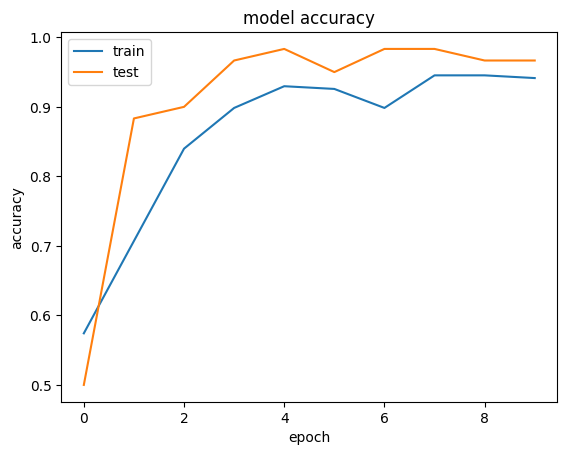

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# **Summarize history for loss**

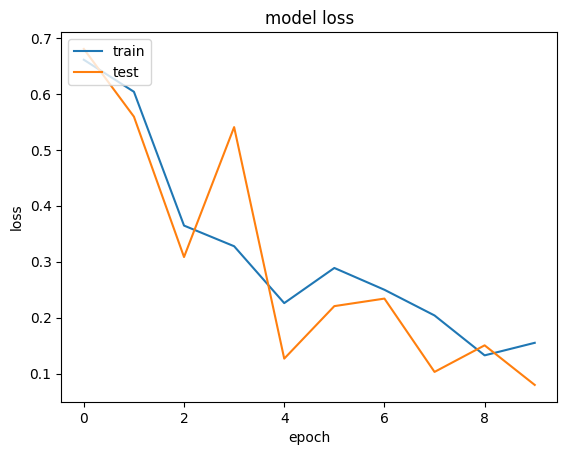

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Predictions from X-Ray Images**

1/1 [==============================] - 0s 108ms/step
This Xray Image is of positive covid-19 patient
Prediction Of Our Model :  Positive For Covid-19


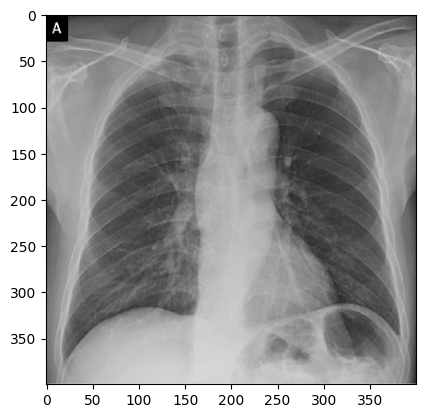

In [ ]:
import numpy as np
# from google.colab.patches import cv2_imshow
import cv2

xtest_image = image.load_img('/content/data/Dataset/Prediction/ryct.2020200034.fig2.jpeg', target_size = (224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results=(model.predict(xtest_image) > 0.5).astype("int32")
# training_set.class_indices
imggg = cv2.imread('/content/data/Dataset/Prediction/ryct.2020200034.fig2.jpeg')
print("This Xray Image is of positive covid-19 patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))
plt.imshow(imggg)
# cv2_imshow(imggg)
# print(results)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)

In [ ]:
results

array([0])

1/1 [==============================] - 0s 106ms/step
This Xray Image is of Negative covid-19 patient
Prediction Of Our Model :  Negative for Covid-19


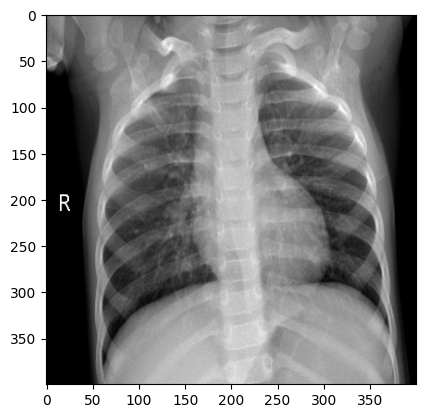

In [ ]:
 import numpy as np
# from google.colab.patches import cv2_imshow

xtest_image1 = image.load_img('/content/data/Dataset/Prediction/NORMAL2-IM-0354-0001.jpeg', target_size = (224, 224))
xtest_image1 = image.img_to_array(xtest_image1)
xtest_image1 = np.expand_dims(xtest_image1, axis = 0) 
results1=(model.predict(xtest_image1) > 0.5).astype("int32")
# training_set.class_indices

imggg = cv2.imread('/content/data/Dataset/Prediction/NORMAL2-IM-0354-0001.jpeg')
print("This Xray Image is of Negative covid-19 patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))

plt.imshow(imggg)
# cv2_imshow(imggg)
# print(results)
if results1[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)